# US Health Outcomes 

## Introduction
This project investigates county-level health outcomes in the United States using the CDC’s PLACES dataset, which provides small and detailed estimates for public health indicators. 

The dataset contains over 2 million records, each representing a county, a specific health condition, and its associated prevalence rate, both crude and age-adjusted. This  project will focus on analyzing 4 major health outcomes: obesity, depression, binge drinking, and overall disability.

The central goal is to identify geographic patterns, correlations, and potential socioeconomic factors that influence the previously mentioned patterns. Understanding these complex relationships will expose regional inequalities and can inform future public policy decisions. 

## Changes?
Not at this time. 



# Data
The dataset used in the project is the 2023 CDC PLACES release in CSV format. Data preparation, coded in Python, includes the following steps:

1. Loading the CSV file into Python using pandas.
2. Cleaning column names by stripping leading and trailing spaces.
3. Cleaning the Measure column by stripping spaces and converting text to lowercase for consistent filtering.
4. Filtering for targeted health measures: Obesity, Binge Drinking, Disability, and Depression.
5. Filtering by prevalence type, keeping only age-adjusted values and discarding crude values to ensure comparability across counties.
6. Pivoting the DataFrame so that each row represents a county and each column represents a measure’s prevalence value, resulting in a clean format ready for exploratory data analysis and visualization.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
filePath = "PLACES__Local_Data_for_Better_Health__Place_Data_2023_release.csv"
df = pd.read_csv(filePath)

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2054768, 21)
   Year StateAbbr  StateDesc LocationName DataSource         Category  \
0  2021        MO   Missouri    West Line      BRFSS  Health Outcomes   
1  2021        MO   Missouri  West Plains      BRFSS  Health Outcomes   
2  2021        MO   Missouri     Westwood      BRFSS  Health Outcomes   
3  2021        WI  Wisconsin     Florence      BRFSS       Prevention   
4  2021        MO   Missouri    Whiteside      BRFSS       Disability   

                                             Measure Data_Value_Unit  \
0  Chronic obstructive pulmonary disease among ad...               %   
1             Arthritis among adults aged >=18 years               %   
2             Arthritis among adults aged >=18 years               %   
3  Taking medicine for high blood pressure contro...               %   
4  Cognitive disability among adults ages >=18 years               %   

           Data_Value_Type  Data_Value  ... Data_Value_Footnote  \
0         Crude prevalence      

In [28]:
df.columns = df.columns.str.strip()


df["Measure"] = df["Measure"].str.strip().str.lower()


targetMeasures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]

dfFiltered = df[df["Measure"].isin(targetMeasures)]
dfFiltered = dfFiltered[dfFiltered["Data_Value_Type"] == "Age-adjusted prevalence"]


dfWide = dfFiltered.pivot_table(
    index=["StateAbbr", "LocationName", "TotalPopulation"],
    columns="Measure",
    values="Data_Value"
).reset_index()


dfWide.columns.name = None


print(dfWide.shape)
print(dfWide.head())
print(dfWide["StateAbbr"].unique())


(26530, 7)
  StateAbbr LocationName  TotalPopulation  \
0        AK     Akiachak              627   
1        AK        Akiak              346   
2        AK       Akutan             1027   
3        AK     Alakanuk              677   
4        AK    Aleknagik              219   

   any disability among adults aged >=18 years  \
0                                         50.5   
1                                         50.4   
2                                         28.5   
3                                         54.0   
4                                         41.4   

   binge drinking among adults aged >=18 years  \
0                                         15.8   
1                                         15.6   
2                                         15.1   
3                                         15.3   
4                                         18.6   

   depression among adults aged >=18 years  \
0                                     22.8   
1                       

The filtered data contains 26530 rows, with each row representing a U.S location. 

Descriptive statistics show that obesity and any form of disability are more prevalent than binge drinking and depression, with average prevalence values of 36.1% and 29.8% compared to 17.9% and 23.5%, respectively. 
The standard deviations for obesity (5.6) and disability (6.8) are higher than those for depression (3.5) and binge drinking (2.8), indicating a wider spread of values. 

State-level bar charts reveal clear regional patterns. 
Southern states generally exhibit higher prevalence of obesity, depression, and disability, while binge drinking deviates from this pattern, being concentrated in the Midwest, with Wisconsin showing the highest rates. These patterns suggest geographic clustering of negative health outcomes.

Correlation analysis supports these observations. Obesity and disability are strongly positively correlated, indicating that these conditions often co-occur. 
Depression shows moderate positive correlation with obesity and disability, while binge drinking is negatively correlated with the other three measures, with the strongest negative correlation observed with disability. These findings highlight interesting relationships in the data and provide a foundation for further analysis.

Hypothesis 1: Binge drinking is negatively correlated with disability, obesity, and depression implying that causes of said medical condition may be influenced by different socioeconomic and health patterns that the other measures. 


In [29]:
print("Select a health measure to sort states by (ascending):")


measureColumnsDictionary = {
    1: "obesity among adults aged >=18 years",
    2: "depression among adults aged >=18 years",
    3: "binge drinking among adults aged >=18 years",
    4: "any disability among adults aged >=18 years"
}


for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")


choice = int(input("\nEnter 1, 2, 3, or 4: ").strip())


selectedMeasure = measureColumnsDictionary[choice]


dfStateAverage = dfWide.groupby("StateAbbr")[selectedMeasure].mean().reset_index()


dfStateAverage = dfStateAverage.sort_values(selectedMeasure, ascending=False).reset_index(drop=True)


print(f"States sorted by ascending {selectedMeasure.title()}:")
print(dfStateAverage)


Select a health measure to sort states by (ascending):
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years



Enter 1, 2, 3, or 4:  1


States sorted by ascending Obesity Among Adults Aged >=18 Years:
   StateAbbr  obesity among adults aged >=18 years
0         MS                             42.653911
1         WV                             41.431043
2         OK                             41.251897
3         LA                             40.519486
4         AL                             40.514462
5         AR                             39.586847
6         OH                             39.307615
7         MO                             39.223593
8         SC                             39.102828
9         KY                             38.850760
10        ND                             38.765909
11        NE                             38.700825
12        KS                             38.631973
13        TX                             38.106106
14        GA                             37.804715
15        AK                             37.769869
16        IN                             37.553414
17        NC     

Select a health measure:
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years


Enter 1, 2, 3, or 4:  1
Enter the 2-letter state abbreviation AK


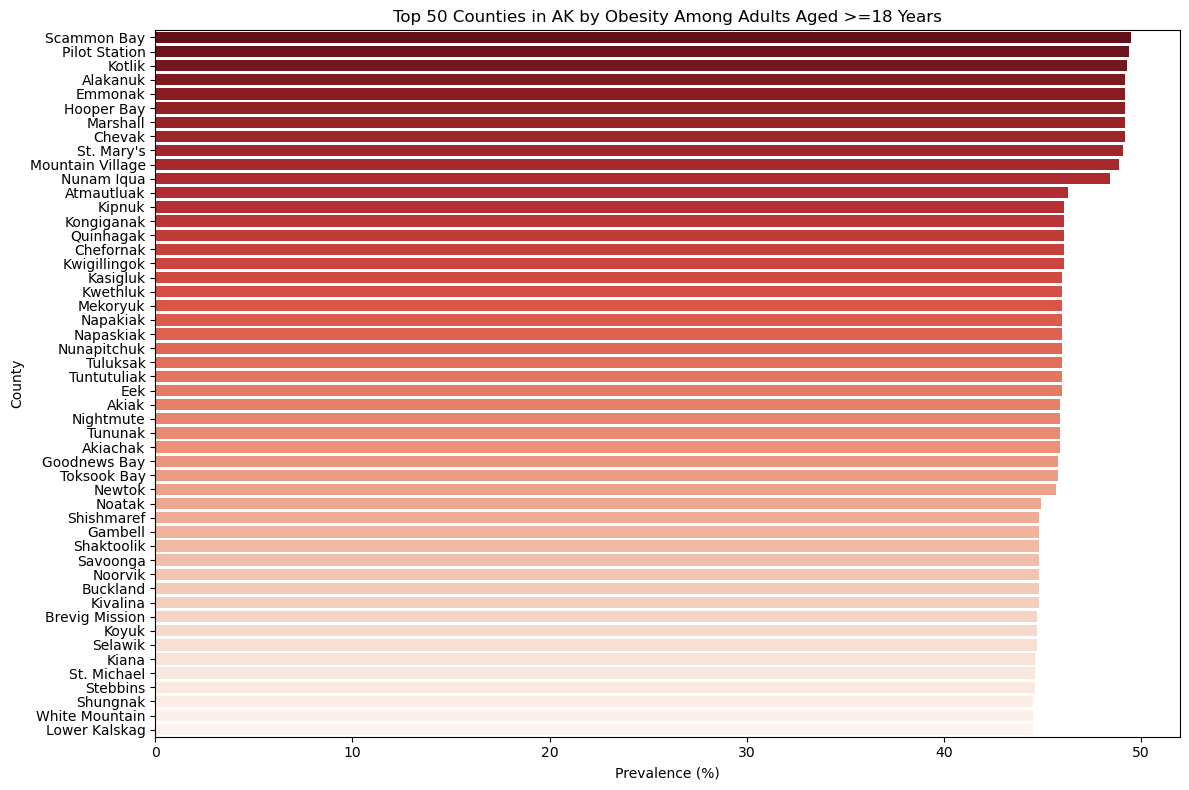

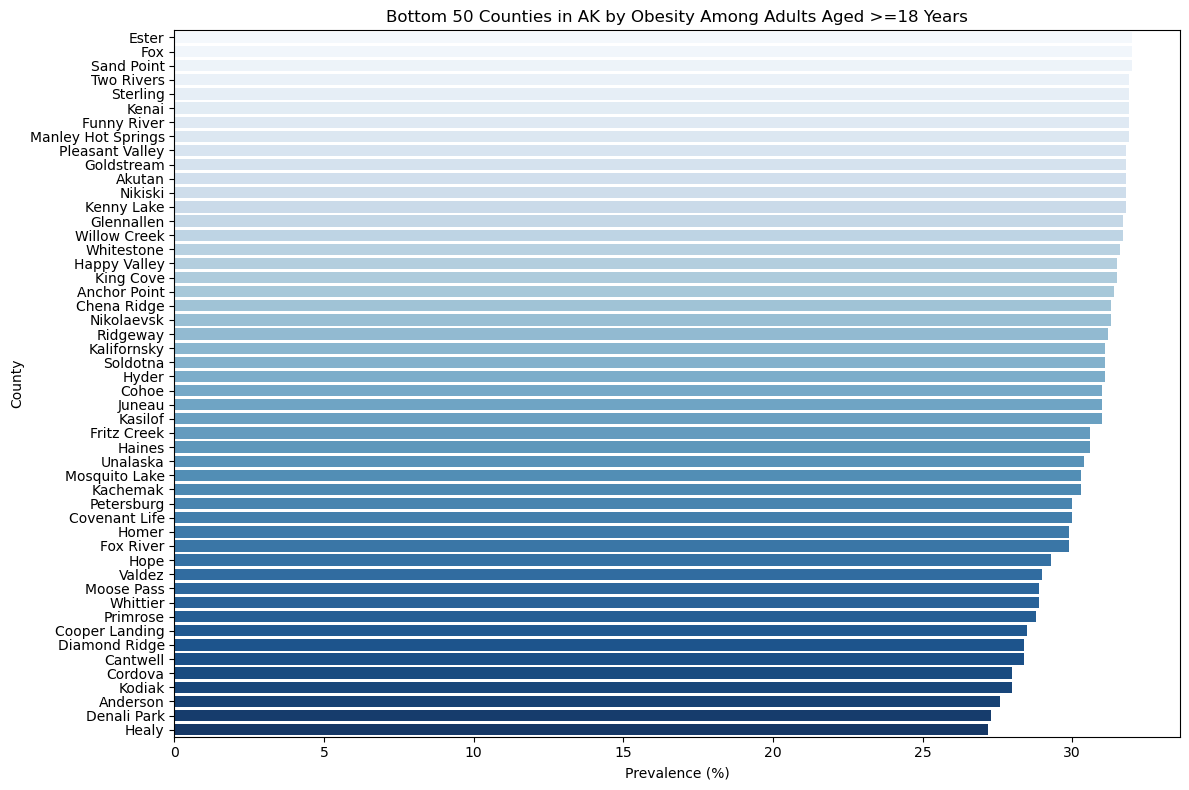

In [30]:
print("Select a health measure:")
for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")


choice2 = int(input("Enter 1, 2, 3, or 4: ").strip())
selectedMeasure2 = measureColumnsDictionary[choice2]


state = input("Enter the 2-letter state abbreviation").strip().upper()


dfState = dfWide[dfWide["StateAbbr"] == state]


dfState = dfState.sort_values(selectedMeasure2, ascending=False)


topLocations = dfState.head(50)


plt.figure(figsize=(12,8))
sns.barplot(x=selectedMeasure2, y="LocationName", hue="LocationName", data=topLocations, palette="Reds_r", legend=False)
plt.title(f"Top 50 Counties in {state} by {selectedMeasure2.title()}")
plt.xlabel("Prevalence (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()


bottomLocations = dfState.tail(50)


plt.figure(figsize=(12,8))
sns.barplot(x=selectedMeasure2, y="LocationName", hue="LocationName", data=bottomLocations, palette="Blues", legend=False)
plt.title(f"Bottom 50 Counties in {state} by {selectedMeasure2.title()}")
plt.xlabel("Prevalence (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()

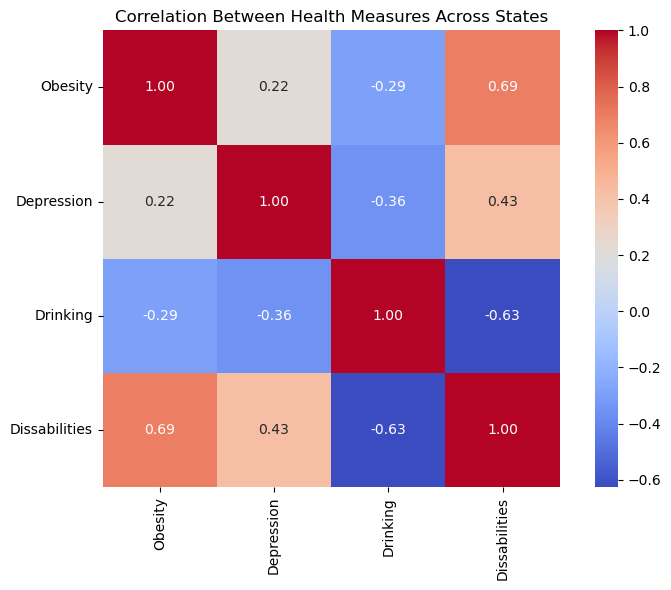

In [45]:
measureColumns = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]


dfState = dfWide.groupby("StateAbbr")[measureColumns].mean()


stateCorrelation = dfState.corr()


plt.figure(figsize=(8, 6))
ax = sns.heatmap(stateCorrelation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
ax.set(title="Correlation Between Health Measures Across States")

#Renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Dissabilities"]
ax.set_xticks(np.arange(len(newLabels)) + 0.5)
ax.set_xticklabels(newLabels)
ax.set_yticks(np.arange(len(newLabels)) + 0.5)
ax.set_yticklabels(newLabels)

#tightening and showing the figure
plt.tight_layout()
plt.show()


Violin plot

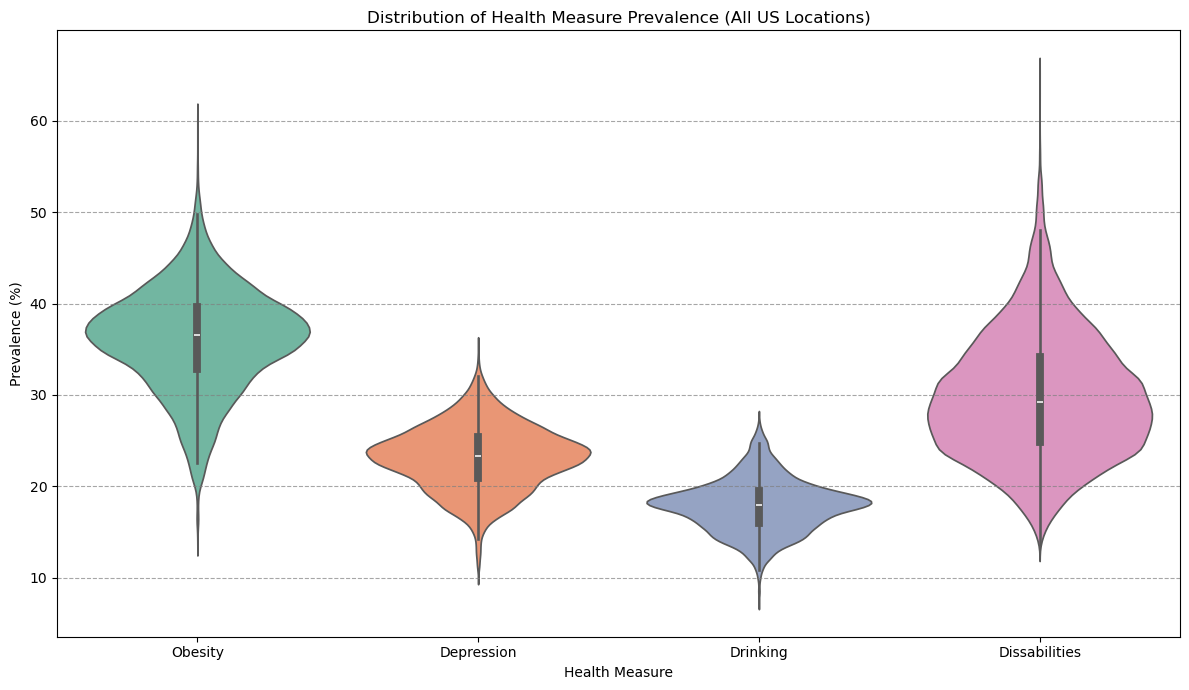

In [47]:
dfLong = dfWide.melt(id_vars=["StateAbbr", "LocationName"],
                     value_vars=measureColumns,
                     var_name="Measure",
                     value_name="Prevalence")

plt.figure(figsize=(12, 7))
ax = sns.violinplot(data=dfLong, x="Measure", y="Prevalence", hue="Measure", palette="Set2", legend=False)
ax.set(title='Distribution of Health Measure Prevalence (All US Locations)', xlabel='Health Measure', ylabel='Prevalence (%)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Dissabilities"]
ax.set_xticks(range(len(newLabels)))
ax.set_xticklabels(newLabels)
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.7)

#tightening and showing the figure
plt.tight_layout()
plt.show()